In [43]:
#libraries needed
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from collections import Counter
import nltk
import re
import numpy as np
import pandas as pd
import json
import tweepy

In [44]:
#connecting to the twitter api
consumer_key = "Cyv2nqO0d4eZJACRNrEfNzCl5"
consumer_secret = "BvOLBvXgCVZRFQ8NqOpRT1lbzNtEHyJ79OG8pX1vlrcYm5p4yi"
access_token = "1496862457788350469-6p6gyEW0iZNyR116e2ExjU9qCi0jTU"
access_token_secret = "SiZTIOjRs0BXG6xQaurPtFOvPTgCvkv9Svpimg8ZJdjTN"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAAxDfgEAAAAALBw%2BWT6Gy7jiGHZVjuzedxTH44M%3DdezkXFZkR62g5HfPkS70ybKD1uOazPfltNbpjSsWLcJCL3NlsC"

client = tweepy.Client(bearer_token)
    
print(client)

In [45]:
#writing data to file
def writeData():
    pass
    # key words to search for tweets
    
writeData()

query = "football today OR manchester united"
tweets = client.search_recent_tweets(query=query, max_results=100,tweet_fields=["id","text","created_at","lang"], expansions=["author_id",],user_fields=["name", "username","profile_image_url","description"])

tweet_data = []
for tweet in tweets.data:
    tweet_data.append(tweet.data)

tweets_df = pd.DataFrame(tweet_data)
tweets_df.rename(columns={"text":"Text","id":"ID","author_id":"Author ID","lang":"Language","created_at":"Created At"},inplace=True)
tweets_df["Author ID"] = tweets_df["Author ID"].astype(str)

tweets_df[:10]

,Language,ID,Author ID,Created At,Text
0,fr,1559149825626701825,1613596885,2022-08-15T12:07:40.000Z,RT @ActuFoot_: La situation de Cristiano Ronal...
1,en,1559149825169526786,4837286494,2022-08-15T12:07:40.000Z,RT @DeadlineDayLive: 🚨 Manchester United have ...
2,en,1559149821742702593,1557470023010205697,2022-08-15T12:07:39.000Z,@antony00 I love you I wish you will play Man...
3,en,1559149805649240064,525443142,2022-08-15T12:07:35.000Z,RT @Fergie1975: Another example of the mismana...
4,en,1559149802973175811,1476661325552041985,2022-08-15T12:07:35.000Z,RT @ManUtdMEN: Manchester United players get d...
5,en,1559149799097507840,330832378,2022-08-15T12:07:34.000Z,"RT @DeadlineDayLive: 🚨 PSG are preparing a ""bu..."
6,en,1559149799076675586,294802847,2022-08-15T12:07:34.000Z,RT @DeadlineDayLive: 🚨 Frenkie De Jong would p...
7,fr,1559149792269217793,1341003665491054598,2022-08-15T12:07:32.000Z,RT @Omaar95z: Le divertissement de ce début de...
8,en,1559149792206413825,964807841390518272,2022-08-15T12:07:32.000Z,RT @Balaam_256: Manchester United are close to...
9,en,1559149788569935874,277437465,2022-08-15T12:07:31.000Z,RT @ConorSketches: This. Is. Manchester. Unite...


In [46]:
#getting the details of the user
users = tweets.includes["users"]

users_df = pd.DataFrame(users)
users_df.rename(columns={"description":"Description","id":"Author ID","name":"Name","profile_image_url":"Profile Image URL","username":"Username"},inplace=True)
users_df["Author ID"] = tweets_df["Author ID"].astype(str)


users_df.head()

,Description,Author ID,Name,Profile Image URL,Username
0,,1613596885,Tom,https://pbs.twimg.com/profile_images/108594317...,GiammarinoTom1
1,"Shoot for the stars, Aim for the moon | 🇲🇽",4837286494,alejandro,https://pbs.twimg.com/profile_images/142454070...,_alejandrox22
2,,1557470023010205697,William Francis,https://pbs.twimg.com/profile_images/155747015...,William72705486
3,No Carrick No Party,525443142,David O'Sullivan,https://pbs.twimg.com/profile_images/969159696...,DaveSullie
4,,1476661325552041985,Acheampong Agyei Benjamin,https://pbs.twimg.com/profile_images/147666156...,AcheampongAgye2


In [56]:
#joining the data of the user and the details of the tweet
result_df = pd.merge(tweets_df,users_df, how="inner")

result_df.head()

,Language,ID,Author ID,Created At,Text,Description,Name,Profile Image URL,Username
0,fr,1559149825626701825,1613596885,2022-08-15T12:07:40.000Z,RT @ActuFoot_: La situation de Cristiano Ronal...,,Tom,https://pbs.twimg.com/profile_images/108594317...,GiammarinoTom1
1,en,1559149825169526786,4837286494,2022-08-15T12:07:40.000Z,RT @DeadlineDayLive: 🚨 Manchester United have ...,"Shoot for the stars, Aim for the moon | 🇲🇽",alejandro,https://pbs.twimg.com/profile_images/142454070...,_alejandrox22
2,en,1559149821742702593,1557470023010205697,2022-08-15T12:07:39.000Z,@antony00 I love you I wish you will play Man...,,William Francis,https://pbs.twimg.com/profile_images/155747015...,William72705486
3,en,1559149805649240064,525443142,2022-08-15T12:07:35.000Z,RT @Fergie1975: Another example of the mismana...,No Carrick No Party,David O'Sullivan,https://pbs.twimg.com/profile_images/969159696...,DaveSullie
4,en,1559149802973175811,1476661325552041985,2022-08-15T12:07:35.000Z,RT @ManUtdMEN: Manchester United players get d...,,Acheampong Agyei Benjamin,https://pbs.twimg.com/profile_images/147666156...,AcheampongAgye2


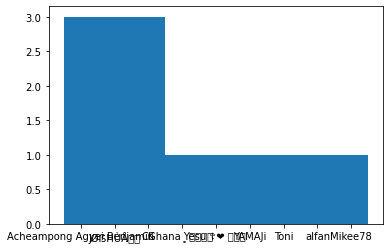

In [85]:
#getting authors with the same names
duplicate_users = []
users     = result_df['Name'].tolist()


for i in range(len(users)):
    for j in range(i+1, len(users)):
        if(users[i] == users[j] and users[i]):
            duplicate_users.append(users[i])


count = Counter(duplicate_users)
count.most_common(10)

labels, values = zip(*Counter(duplicate_users).items())
indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0, labels)

plt.show()

In [48]:
result_df.to_csv("tweets_data")

In [49]:
#getting the info about the work
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Language           107 non-null    object
 1   ID                 107 non-null    object
 2   Author ID          107 non-null    object
 3   Created At         107 non-null    object
 4   Text               107 non-null    object
 5   Description        107 non-null    object
 6   Name               107 non-null    object
 7   Profile Image URL  107 non-null    object
 8   Username           107 non-null    object
dtypes: object(9)
memory usage: 8.4+ KB


In [50]:
#getting null values
result_df.isnull().sum()

Language             0
ID                   0
Author ID            0
Created At           0
Text                 0
Description          0
Name                 0
Profile Image URL    0
Username             0
dtype: int64

In [51]:
#number of different unique languages in all tweets
print(len(result_df["Language"].unique()))

3


In [52]:
#removing #, @ and links 
# removing hashtags
def remove_hashtags(text):
    hashtag = re.compile("#")
    return hashtag.sub("", text)

#removing @ symbols
def remove_at(text):
    at = re.compile("@")
    return at.sub("", text)

# removing links
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
def get_words(text):
    return (text)


result_df["Text"]=result_df["Text"].apply(remove_at)
result_df["Text"]=result_df["Text"].apply(remove_hashtags)
result_df["Text"]=result_df["Text"].apply(remove_URL)

In [53]:
#performing nlp basics
stop_words = set(stopwords.words('english'))

for i in range(result_df.shape[0]):
    # tokenizing words in each tweet
    words = word_tokenize(result_df["Text"][i])
    # joining the tokens to form a sentence
    tokens = [word for word in words if word not in stop_words]
    clean_tokens =" ".join([word for word in words if word.isalnum()])
    result_df["Text"][i] = clean_tokens


In [54]:
#getting a head of the most frequent words
def tweet_freq(text):
    tokens = word_tokenize(text)
    count = Counter(tokens)
    #print(count)
    return count.most_common(10)

result_df["Most Frequent words in Tweet"] = result_df["Text"].apply(tweet_freq)
result_df.head()

,Language,ID,Author ID,Created At,Text,Description,Name,Profile Image URL,Username,Most Frequent words in Tweet
0,fr,1559149825626701825,1613596885,2022-08-15T12:07:40.000Z,RT La situation de Cristiano Ronaldo est telle...,,Tom,https://pbs.twimg.com/profile_images/108594317...,GiammarinoTom1,"[(de, 2), (RT, 1), (La, 1), (situation, 1), (C..."
1,en,1559149825169526786,4837286494,2022-08-15T12:07:40.000Z,RT DeadlineDayLive Manchester United have cons...,"Shoot for the stars, Aim for the moon | 🇲🇽",alejandro,https://pbs.twimg.com/profile_images/142454070...,_alejandrox22,"[(RT, 1), (DeadlineDayLive, 1), (Manchester, 1..."
2,en,1559149821742702593,1557470023010205697,2022-08-15T12:07:39.000Z,antony00 I love you I wish you will play Manch...,,William Francis,https://pbs.twimg.com/profile_images/155747015...,William72705486,"[(I, 2), (you, 2), (antony00, 1), (love, 1), (..."
3,en,1559149805649240064,525443142,2022-08-15T12:07:35.000Z,RT Fergie1975 Another example of the mismanage...,No Carrick No Party,David O'Sullivan,https://pbs.twimg.com/profile_images/969159696...,DaveSullie,"[(of, 3), (RT, 1), (Fergie1975, 1), (Another, ..."
4,en,1559149802973175811,1476661325552041985,2022-08-15T12:07:35.000Z,RT ManUtdMEN Manchester United players get day...,,Acheampong Agyei Benjamin,https://pbs.twimg.com/profile_images/147666156...,AcheampongAgye2,"[(RT, 1), (ManUtdMEN, 1), (Manchester, 1), (Un..."
